## Netfilx Movies Dataset Project

### Question
- what is the most frequent genre of movies released on Netflix
- what genres has highest votes?
- what movie got the highest popularity? what's its genre?
- what movie got the lowest popularity? what's its genre?
- which year has the most filmmed movies?

------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_excel("D:\\Dataset_Practice\\Netflix_movies_data.xlsx")  # Using raw string


In [6]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [7]:
df.info() # to check all columns datatype 

# this is showing my data type is string so i need to change it and from date column only i need year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9817 non-null   float64
 4   Vote_Count         9817 non-null   float64
 5   Vote_Average       9817 non-null   float64
 6   Original_Language  9817 non-null   object 
 7   Genre              9817 non-null   object 
 8   Poster_Url         9817 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [8]:
df['Genre'].head() # check Genre column few details

0    Adventure, Fantasy, Science Fiction
1         Drama, Horror, Thriller, Crime
2                 Drama, Fantasy, Horror
3                          Comedy, Drama
4                        Fantasy, Horror
Name: Genre, dtype: object

In [9]:
df.duplicated()  # check duplicate values in dataset

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [10]:
df.duplicated().sum() # check count of duplicate values

0

In [11]:
df.describe()  # this tells about only numerical columns

,Popularity,Vote_Count,Vote_Average
count,9817.000000,9817.000000,9817.000000
mean,40.328772,1393.446165,6.438973
std,108.926952,2612.006998,1.129787
min,13.354000,0.000000,0.000000
25%,16.129000,147.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.163000,1377.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [12]:
# change datatype of date column
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y')

In [13]:
# in the date column extract year only
df['Release_Date'] = df['Release_Date'].dt.year


In [14]:
#check datatype of date column
df['Release_Date'].dtypes

dtype('int32')

In [15]:
# Create a variable for those columns which needs to drop from dataset because those columns no requirement
cols = ['Overview','Original_Language','Poster_Url']


In [16]:
df.drop(cols , axis= 1, inplace= True)

In [17]:
df.columns # check that columns are dropped or not

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [18]:
df['Vote_Average'].unique()

array([ 8. ,  7.9,  8.2,  7.7,  7.6,  8.1,  7.2,  7.5,  7.8,  8.4,  7.3,
        6.9,  6.8,  6.2,  7.4,  8.3,  7.1,  6.5,  6.4,  6.6,  7. ,  5.9,
        6.3,  6.7,  8.5,  6.1,  5.8,  nan,  5.4,  5.3,  4.9,  5. ,  5.2,
        3.2,  4.1,  5.7,  8.7,  3.9,  4.8,  4.5,  5.6,  8.6,  5.5,  6. ,
        5.1,  4.6,  4.3,  4.7,  3.3,  3.1,  4.4,  3. ,  4. ,  4.2,  2.4,
        0. ,  3.5,  3.4,  2.9,  3.6,  3.8,  2.8,  8.8,  2. ,  3.7,  1.8,
        2.5,  9. ,  9.2,  8.9,  9.1, 10. ,  2.6,  1.5,  2.2])

In [19]:
# calculate meanvalue from value_Average column and fill where nan
mean_value = df['Vote_Average'].mean()
mean_value

6.43897320973821

In [20]:
# replace nan with mean_value
df['Vote_Average'] = df['Vote_Average'].fillna(mean_value)

In [21]:
# for Vote_average column create categorize_col function 
def categorize_col(df, col, labels):
    """
    Categorize a column into bins based on quartiles.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to be categorized.
        labels (list): The labels for the bins.

    Returns:
        pd.DataFrame: DataFrame with the categorized column.
    """
    # Define edges using quartiles
    edges = [
        df[col].describe()['min'],  # Minimum value
        df[col].describe()['25%'],  # 25th percentile
        df[col].describe()['50%'],  # Median
        df[col].describe()['75%'],  # 75th percentile
        df[col].describe()['max']   # Maximum value
    ]

    # Categorize the column using pd.cut
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [22]:
labels = ['not_popular', 'below_avg', 'average','Popular']
categorize_col(df, 'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1902,A Trip to the Moon,18.356,1284.0,Popular,"Adventure, Fantasy, Science Fiction"
1,1920,The Cabinet of Dr. Caligari,17.858,1075.0,Popular,"Drama, Horror, Thriller, Crime"
2,1921,The Phantom Carriage,15.371,213.0,Popular,"Drama, Fantasy, Horror"
3,1921,The Kid,14.338,1528.0,Popular,"Comedy, Drama"
4,1922,Nosferatu,28.638,1406.0,Popular,"Fantasy, Horror"
...,...,...,...,...,...,...
9822,2023,The Little Mermaid,14.016,0.0,NaN,"Adventure, Family, Fantasy, Romance"
9823,2023,Transformers: Rise of the Beasts,44.599,0.0,NaN,"Action, Science Fiction, Adventure"
9824,2023,The Flash,119.846,0.0,NaN,"Action, Adventure, Science Fiction, Fantasy, D..."
9825,2023,Ant-Man and the Wasp: Quantumania,17.050,0.0,NaN,"Adventure, Science Fiction, Comedy"


In [23]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2466
Popular        2446
average        2408
below_avg      2407
Name: count, dtype: int64

In [24]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we'd  split genres into a list and then explode our dataframe to have only one genreper row for each movie

In [25]:
df['Genre'] = df['Genre'].str.split(', ')

# Explanation of the Code:
1. Splitting the Genre Column:
```
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('genre').reset_index(drop=True)
```

- This line takes the Genre column in the DataFrame, which is expected to contain string values where multiple genres are separated by a comma and a space (, ).
 
- The .str.split(', ') method splits each string in the Genre column into a list of genres.
    - **For example:**
        - Before splitting: "Action, Adventure, Science Fiction"
        - After splitting: ["Action", "Adventure", "Science Fiction"]
- Now, the Genre column contains lists instead of strings.

In [26]:
df = df.explode('Genre').reset_index(drop=True)

## 2. Exploding the Genre Column:
```
df = df.explode('Genre').reset_index(drop=True)
```

- The .explode('Genre') is used to transform each element in the Genre column (which is now a list) into a separate row, duplicating all other columns for each genre.
  - For example:
 
- **Before exploding:**
```
Title         ,                                 Genre
Spider-Man: No Way Home   ["Action", "Adventure", "Science Fiction"]
```


- **After exploding:**
```
Title                  Genre
Spider-Man: No Way Home   Action
Spider-Man: No Way Home   Adventure
Spider-Man: No Way Home   Science Fiction
```

- The .reset_index(drop=True) resets the index after the explosion, so the DataFrame's index becomes sequential     and consistent.

## Converting Genre Column to Categorical:
- astype('category'): converts the Genre column from its current data type (e.g., object or string) to the      category data type.
  
- The category data type is useful when a column has a limited set of unique values (categories), such as genres in this case (e.g., "Action", "Drama", "Comedy").
  
## Why Convert to Category?
**Memory Efficiency:**
- A categorical column stores each unique value (category) only once, assigning a code to represent each value.   This reduces memory usage compared to object or string types.

**Performance:**
- Operations like grouping, filtering, or comparisons on categorical columns are faster than on string or object columns.
```
Genre     non-null  object  # when datatype is object memory used #
memory usage: 922.5+ KB
```

```
Genre     non-null  category  # when datatype is category memoey less used.#
memory usage: 748.8+ KB
```

In [27]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [28]:
df.nunique() # check unique values all columns

Release_Date     100
Title           9405
Popularity      8080
Vote_Count      3264
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

## **Q-1.what is the most frequent genre of movies released on Netflix**

In [29]:
df['Genre'].describe() # top genre is "Drama"

count     25523
unique       19
top       Drama
freq       3713
Name: Genre, dtype: object

Text(0.5, 1.0, 'Genre column distribution')

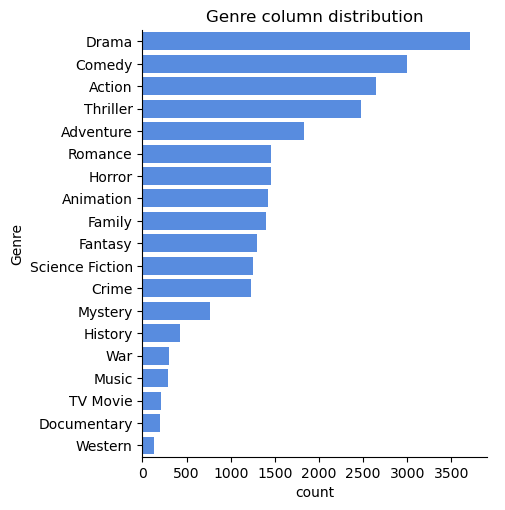

In [30]:
# Graphical Representation
sns.catplot(
y='Genre' , data=df,kind='count',
order=df['Genre'].value_counts().index,
color='#4287f5'
)

plt.title('Genre column distribution')

## **Q2. what genres has highest votes?**

Text(0.5, 1.0, 'Votes Distribution')

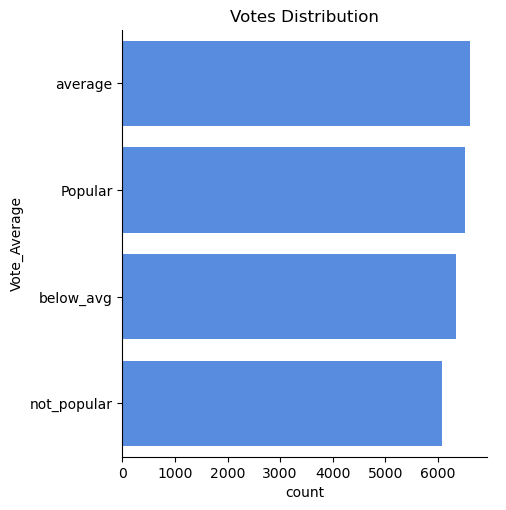

In [31]:
sns.catplot(
y='Vote_Average' , data=df,kind='count',
order=df['Vote_Average'].value_counts().index,
color='#4287f5'
)

plt.title('Votes Distribution')

### **Q3. what movie got the highest popularity? what's its genre?**

In [32]:
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25186,2021,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action
25187,2021,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure
25188,2021,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction


### **Q4. what movie got the lowest popularity? what's its genre?**

In [33]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
2249,1984,Threads,13.354,186.0,Popular,War
2250,1984,Threads,13.354,186.0,Popular,Drama
2251,1984,Threads,13.354,186.0,Popular,Science Fiction
23948,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
23949,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
23950,2021,The United States vs. Billie Holiday,13.354,152.0,average,History


### **Q5. which year has the most filmmed movies?**

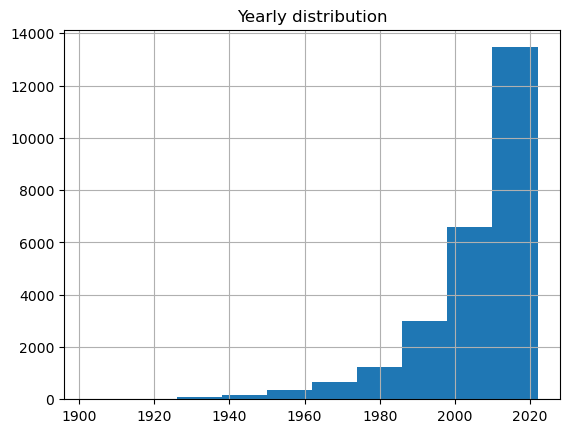

In [34]:
df['Release_Date'].hist()
plt.title("Yearly distribution")
plt.show()